## Matplotlib


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('athlete_events.csv')

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


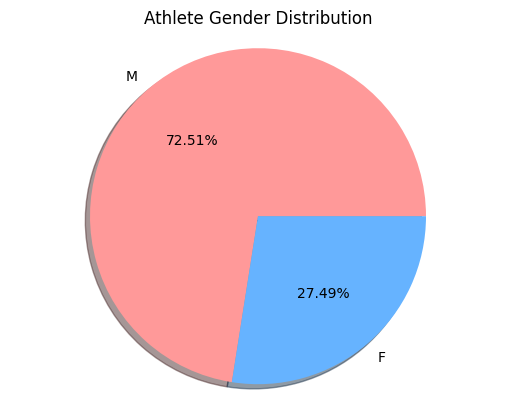

In [ ]:

gender_counts = df['Sex'].value_counts()
gender_counts.plot(kind='pie', 
                   autopct='%.2f%%', 
                   colors=['#ff9999','#66b3ff'], 
                   shadow=True)
plt.axis('equal')
plt.title('Athlete Gender Distribution')
plt.ylabel('')
plt.show()

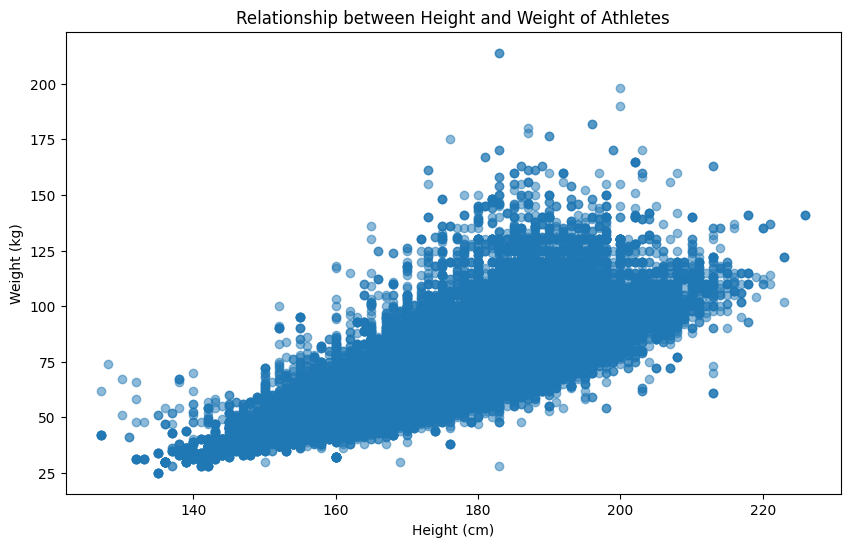

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Height'], df['Weight'], alpha=0.5)
plt.title('Relationship between Height and Weight of Athletes')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

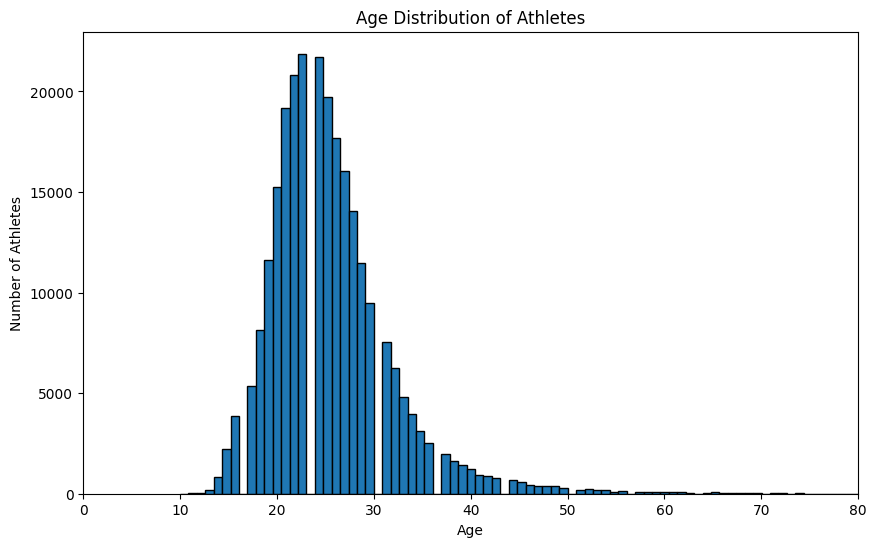

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=100, edgecolor='black')
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.xlim(0, 80)
plt.show()

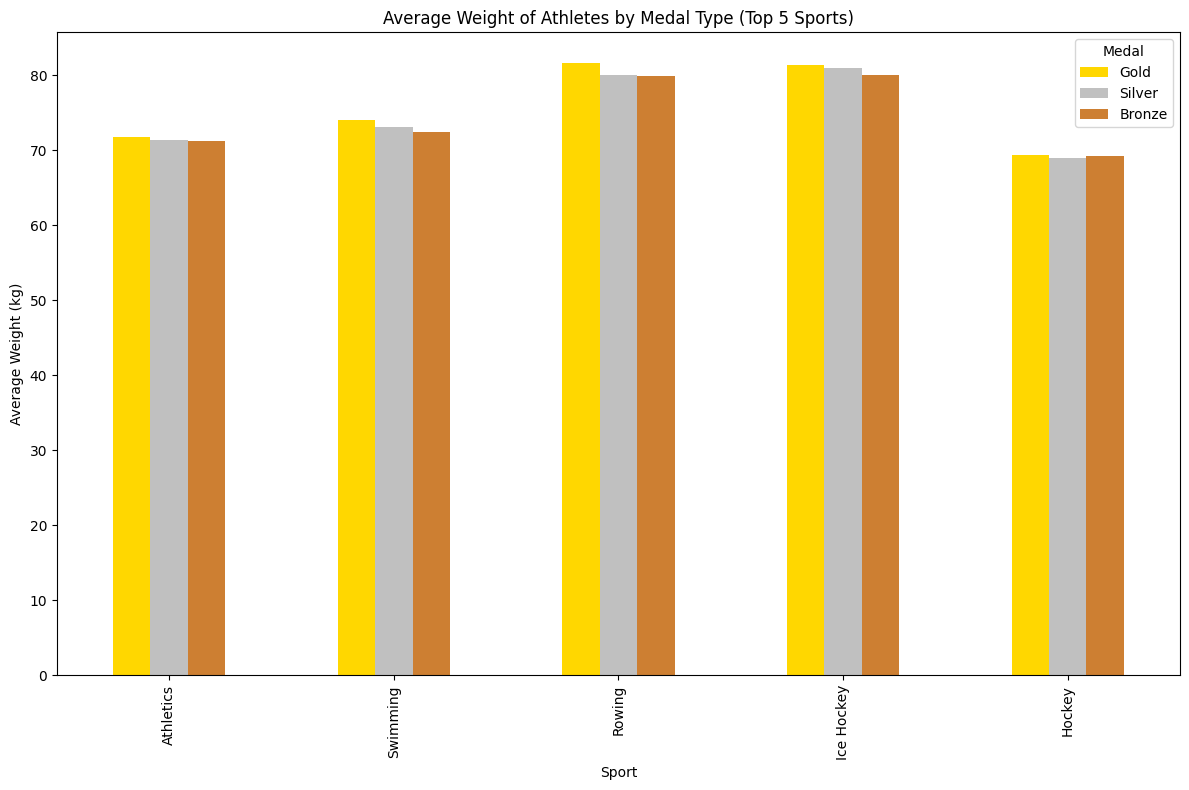

In [40]:
medal_data = df.dropna(subset=['Medal', 'Weight'])

top_sports = medal_data['Sport'].value_counts().head(5).index.tolist()

avg_weight = pd.DataFrame(index=top_sports, columns=['Gold', 'Silver', 'Bronze'])

for sport in top_sports:
    gold_athletes = medal_data[(medal_data['Sport'] == sport) & (medal_data['Medal'] == 'Gold')]
    silver_athletes = medal_data[(medal_data['Sport'] == sport) & (medal_data['Medal'] == 'Silver')]
    bronze_athletes = medal_data[(medal_data['Sport'] == sport) & (medal_data['Medal'] == 'Bronze')]
    
    avg_weight.loc[sport, 'Gold'] = gold_athletes['Weight'].mean()
    avg_weight.loc[sport, 'Silver'] = silver_athletes['Weight'].mean()
    avg_weight.loc[sport, 'Bronze'] = bronze_athletes['Weight'].mean()

colors = ['#FFD700', '#C0C0C0', '#CD7F32']
avg_weight.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Average Weight of Athletes by Medal Type (Top 5 Sports)')
plt.xlabel('Sport')
plt.ylabel('Average Weight (kg)')
plt.legend(title='Medal')
plt.tight_layout()
plt.show()

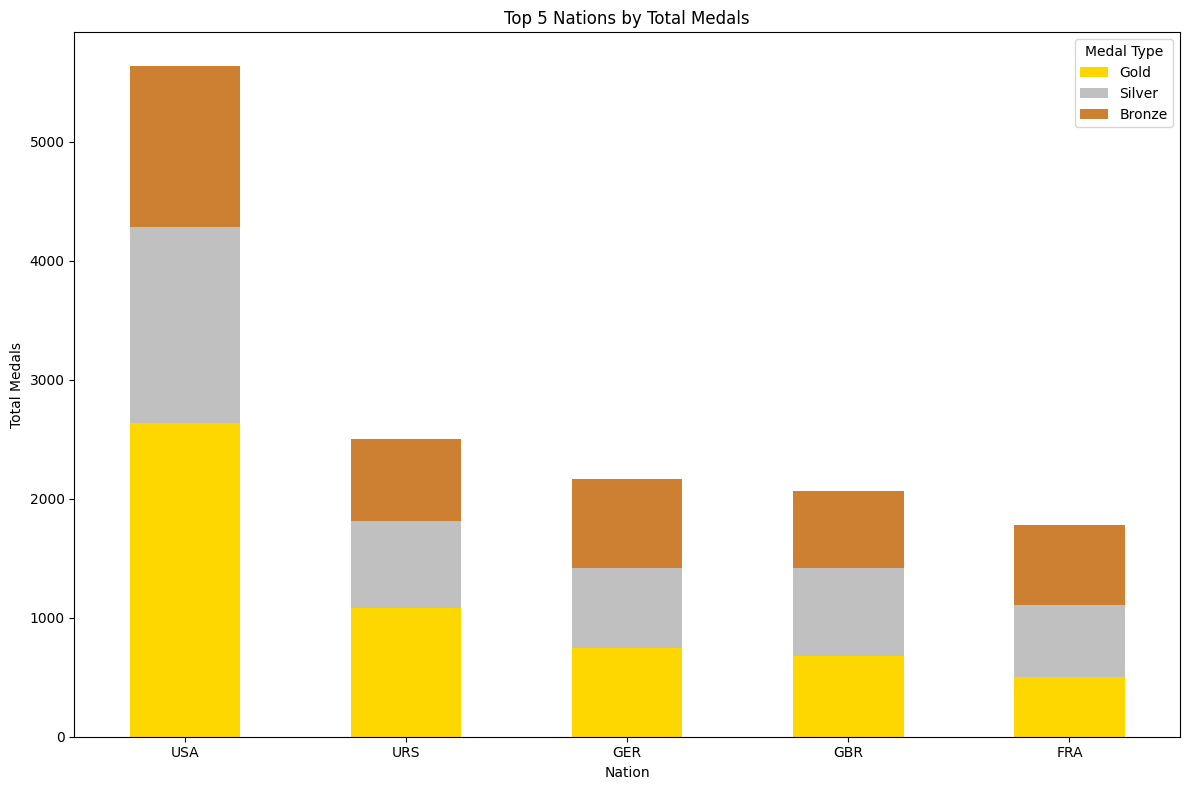

In [50]:
# กรองข้อมูลที่มีเหรียญรางวัล
medal_winners = df.dropna(subset=['Medal'])

# หา 5 ประเทศที่มีเหรียญรวมมากที่สุด
top_5_nations = medal_winners['NOC'].value_counts().head(5).index.tolist()

# สร้าง DataFrame เปล่าสำหรับเก็บผลลัพธ์
medal_count = pd.DataFrame(index=top_5_nations, columns=['Gold', 'Silver', 'Bronze'])

# นับจำนวนเหรียญของแต่ละประเทศด้วย boolean indexing
for nation in top_5_nations:
    gold_count = len(medal_winners[(medal_winners['NOC'] == nation) & (medal_winners['Medal'] == 'Gold')])
    silver_count = len(medal_winners[(medal_winners['NOC'] == nation) & (medal_winners['Medal'] == 'Silver')])
    bronze_count = len(medal_winners[(medal_winners['NOC'] == nation) & (medal_winners['Medal'] == 'Bronze')])
    medal_count.loc[nation, 'Gold'] = gold_count
    medal_count.loc[nation, 'Silver'] = silver_count
    medal_count.loc[nation, 'Bronze'] = bronze_count

# สร้างกราฟแท่งซ้อนกัน
colors = ['#FFD700', '#C0C0C0', '#CD7F32']
medal_count.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Top 5 Nations by Total Medals')
plt.xlabel('Nation')
plt.ylabel('Total Medals')
plt.xticks(rotation=0)
plt.legend(title='Medal Type')
plt.tight_layout()
plt.show()